## Overview Exercise

|null hypotheseis | alt Hypothesis | true pos | true neg | type I | type II|
|:-------------- | :------------ | :----: | :----: | :----: | :----:|
|Avg latency is the same for the new service providers | Avg altency has changed on the new service provider | Avg latency b/w providers is different | There is no statistically significant difference between provider latencies | We determine there is a difference in avg latency b/w providers, but there isn't | We determine there is not a difference in avg latency b/w providers, but there is |
|Online sales stayed the same after the website redesign |Online sales increased or decreased after the website redesign|There was a statistically significant change in sales after the website redesign|There was not a statistically significant change in sales after the website redesign|We determine there was a change in sales after the redesign, but there wasn't a statistically significant one|We determine there was not a change in sales after the redesign, but there was a statistically significant one|
|Sales have stayed the same after the TV ad|Sales have changed after the TV ad|There is no statistically significant change in sales after the TV ad|There is a statistically significant change in sales after the TV ad|We determine there is a change in sales after the TV ad, but there isn't | We determine there is not a change in sales after the TV ad, but there is.|

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pydataset import data
import matplotlib.pyplot as plt
from env import get_db_url

In [2]:
def stats_result(p,null_h,**kwargs):
    """
    Compares p value to α and outputs whether or not the null hypothesis
    is rejected or if it failed to be rejected.
    DOES NOT HANDLE 1-TAILED T TESTS
    
    Required inputs:  p, null_h (str)
    Optional inputs: alpha (default = .05), chi2, r, t
    
    """
    #get r value if passed, else none
    t=kwargs.get('t',None)
    r=kwargs.get('r',None)
    chi2=kwargs.get('chi2',None)
    alpha=kwargs.get('alpha',.05) #default value of alpha is .05
    print(f'\nThe null hypothesis was: {null_h}\n')
    
    if p < alpha: print(f"We reject the null hypothesis, p = {p} | α = {alpha}")
    else: print(f"We failed to reject the null hypothesis, p = {p} | α = {alpha}")
    
    if 't' in kwargs: print(f'  t: {t}')
    if 'r' in kwargs: print(f'  r: {r}')
    if 'chi2' in kwargs: print(f'  chi2: {chi2}')
    return None

## T-Test Exercises

In [3]:
#1) Ace Realty
#Given info
o1_n = 40
o1_mn = 90
o1_stdv = 15

o2_n = 50
o2_mn = 100
o2_stdv = 20

α = .05

null_h = "The two offices take the same time to sell homes"

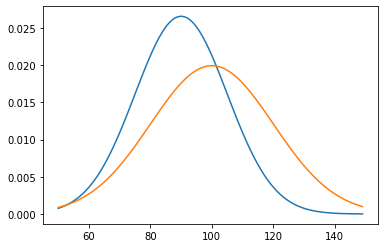

In [4]:
#Taking a look at how the samples overlap
x = np.arange(50,150)
y1 = stats.norm(o1_mn,o1_stdv).pdf(x) 
y2 = stats.norm(o2_mn,o2_stdv).pdf(x)

plt.plot(x,y1,x,y2)

In [5]:
#We have two sample, looking at difference between them (so two tails)
#we are given that they are normally distributed

#independed t-test
t, p = stats.ttest_ind_from_stats(o1_mn,o1_stdv,o1_n,o2_mn,o2_stdv,o2_n,equal_var=False)

In [6]:
stats_result(p,null_h,alpha=α)



The null hypothesis was: The two offices take the same time to sell homes

We reject the null hypothesis, p = 0.00811206270346016 | α = 0.05


In [7]:
#2) MPG dataset
df = data('mpg')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


<AxesSubplot:xlabel='year', ylabel='Count'>

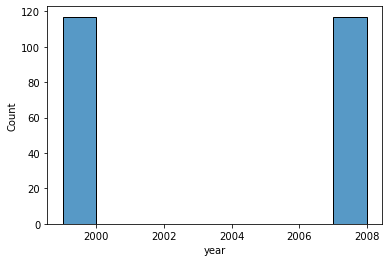

In [8]:
sns.histplot(data=df,x='year')

In [9]:
#2a) is there a difference in fuel-efficiency from cars in 2008 than 1999
null_h = "There is no difference in fuel-efficiency from cars in 2008 and 1999"
#set up new 'average mpg column' - did this b/c i just assume that's what they want.
#Used EPA formula for calculating
df['avg_mpg'] = (df.cty*.55)+(df.hwy*.45)
#pull out that column into two datasets - one for each year
mpg99 = df.avg_mpg[df.year == 1999]
mpg08 = df.avg_mpg[df.year == 2008]

# there are 2, independent samples, so i want ttest_ind

(10.0, 40.0)

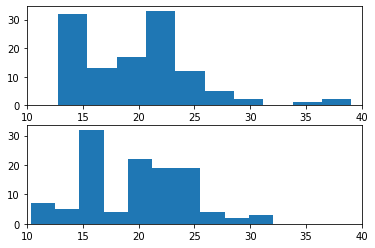

In [10]:
plt.figure()
plt.subplot(211)
plt.hist(mpg99)
plt.xlim(10,40)
plt.subplot(212)
plt.hist(mpg08)
plt.xlim(10,40)

In [11]:
#not that normal, but over 100 values each, so not as worried about normality
print(f'{len(mpg99)}, {len(mpg08)}')

117, 117


In [12]:
#check p of compared variance
stats.levene(mpg99,mpg08)[1]
#if p(levene) is > alpha, then we have equal variance

0.8514113361784937

In [13]:
t, p = stats.ttest_ind(mpg99,mpg08,equal_var=True)
stats_result(p,null_h,alpha=α)


The null hypothesis was: There is no difference in fuel-efficiency from cars in 2008 and 1999

We failed to reject the null hypothesis, p = 0.8030694941407983 | α = 0.05


(array([ 9., 12., 14.,  6.,  2.,  2.,  1.,  0.,  0.,  1.]),
 array([19.15, 21.03, 22.91, 24.79, 26.67, 28.55, 30.43, 32.31, 34.19,
        36.07, 37.95]),
 <BarContainer object of 10 artists>)

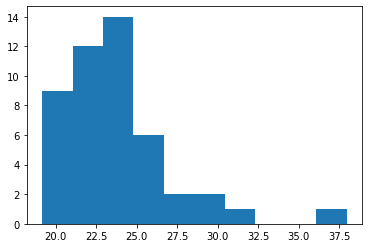

In [14]:
#2b) are compact cars more fuel-efficient than the average car. 
null_h = 'compact cars have the same combined mpg fuel-efficiency as the average car'
mpg_com = df.avg_mpg[df['class'] == 'compact']

plt.hist(mpg_com) #normalish w/ skew, 50ish points

In [15]:

#diff sample sizes. let's check variance
tl, pl = stats.levene(mpg_com,df.cty)
print(f'p(levene) > α: {pl > α}')

p(levene) > α: False


In [16]:
#WRONG WAY
t, p = stats.ttest_ind(df.avg_mpg,mpg_com,equal_var=False)
stats_result(p,null_h,alpha=α)


The null hypothesis was: compact cars have the same combined mpg fuel-efficiency as the average car

We reject the null hypothesis, p = 3.3910472293486603e-09 | α = 0.05


In [17]:
#2b - ALT - BETTER, STILL WRONG) Should be treating this as two separate samples 
#Probably should use one sample ttest

t, p = stats.ttest_1samp(mpg_com,df.avg_mpg.mean())
stats_result(p,null_h,alpha=α)
#whoops, forgot to check direction


The null hypothesis was: compact cars have the same combined mpg fuel-efficiency as the average car

We reject the null hypothesis, p = 6.133395124728956e-10 | α = 0.05


In [18]:
#2b - ALT - BEST). Should do one tail
#update null
null_h = 'compact cars have the same or less city mpg as the average car'

t, p = stats.ttest_1samp(mpg_com,df.avg_mpg.mean())
#get real p
p = p/2

print(f't is positive: {t > 0}')

#can only use this function for one-tailed t after verify t direction and updated p value after using stats module
stats_result(p,null_h,alpha=α,t=t)

t is positive: True

The null hypothesis was: compact cars have the same or less city mpg as the average car

We reject the null hypothesis, p = 3.066697562364478e-10 | α = 0.05
  t: 7.785633406850479


(array([ 1., 10.,  8., 22., 23.,  6.,  4.,  1.,  0.,  2.]),
 array([10.35, 13.22, 16.09, 18.96, 21.83, 24.7 , 27.57, 30.44, 33.31,
        36.18, 39.05]),
 <BarContainer object of 10 artists>)

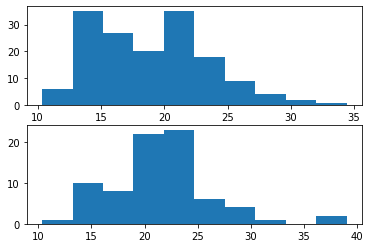

In [19]:
#2c) Do manual cars get better gas mileage than automatic cars
null_h = "Manual cars get the same or worse city mpg"

#break data into our two samples
mpgA = df.avg_mpg[df.trans.str.startswith('a')]
mpgM = df.avg_mpg[df.trans.str.startswith('m')]

plt.figure()
plt.subplot(211)
plt.hist(mpgA)
plt.subplot(212)
plt.hist(mpgM)

In [20]:
#normalish
#see if variance simliar
tl, pl = stats.levene(mpgA,mpgM)

t, p = stats.ttest_ind(mpgA,mpgM,equal_var = (pl > α))
#doing one tail, so immediately update p
p=p/2
stats_result(p,null_h,alpha=α)


The null hypothesis was: Manual cars get the same or worse city mpg

We reject the null hypothesis, p = 3.247026140700205e-06 | α = 0.05


### Correlation Exercises

#### Telco data (#1)

In [21]:
#1
#Does Tenure correlate with monthly charges? Total charges? 
#what if you control for phone and internet?

#get the data
tc = pd.read_csv('Telco_plus.csv')
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  tenure             7049 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 716.0+ KB


In [22]:
#Some nulls in total_charges
#only a few, so dropping those rows from the dataset
tc.dropna(inplace=True)
tc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 0 to 7048
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7038 non-null   object 
 1   gender             7038 non-null   object 
 2   is_senior_citizen  7038 non-null   int64  
 3   partner            7038 non-null   object 
 4   dependents         7038 non-null   object 
 5   phone_service      7038 non-null   int64  
 6   internet_service   7038 non-null   int64  
 7   contract_type      7038 non-null   int64  
 8   payment_type       7038 non-null   object 
 9   monthly_charges    7038 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7038 non-null   object 
 12  tenure             7038 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 769.8+ KB


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

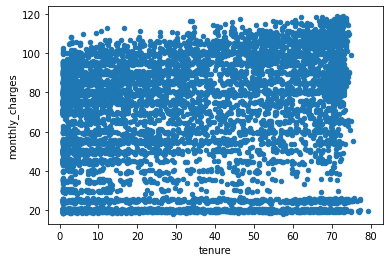

In [23]:
#Does Tenure correlated to monthly charges
#. both pieces of data are continuous

#let's look at a scatter plot
tc.plot.scatter(x='tenure',y='monthly_charges')

In [24]:
null_h = "There is not a linear relationship between tenure and monthly charges"
#Calc corr coefficient and get p
r, p = stats.pearsonr(tc.tenure,tc.monthly_charges)
#print results
stats_result(p,null_h,alpha=α,r=r)


The null hypothesis was: There is not a linear relationship between tenure and monthly charges

We reject the null hypothesis, p = 1.236598664483633e-97 | α = 0.05
  r: 0.24614836711489288


<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

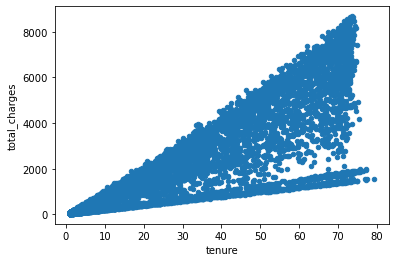

In [25]:
#Does Tenure correlate to total charges?
null_h = "There is not a linear relationship b/w tenure and total charges"
tc.plot.scatter(x='tenure',y='total_charges')

In [26]:
r, p = stats.pearsonr(tc.tenure,tc.total_charges)

stats_result(p,null_h,alpha=α,r=r)


The null hypothesis was: There is not a linear relationship b/w tenure and total charges

We reject the null hypothesis, p = 0.0 | α = 0.05
  r: 0.8258191824783714


In [27]:
#Does Tenure correlate to monthly charges when we control for phone and internet service?

#generate a list of dataframes for each subset of service type
tc_ph = []
tc_int = []

#This would be better if I made it two dimensional and 
# the second row had a list of the control (aka service type)
for i in tc.phone_service.unique():
    df=tc[tc.phone_service == i]
    tc_ph.append(df)

for i in tc.internet_service.unique():
    df=tc[tc.internet_service == i]
    tc_int.append(df)


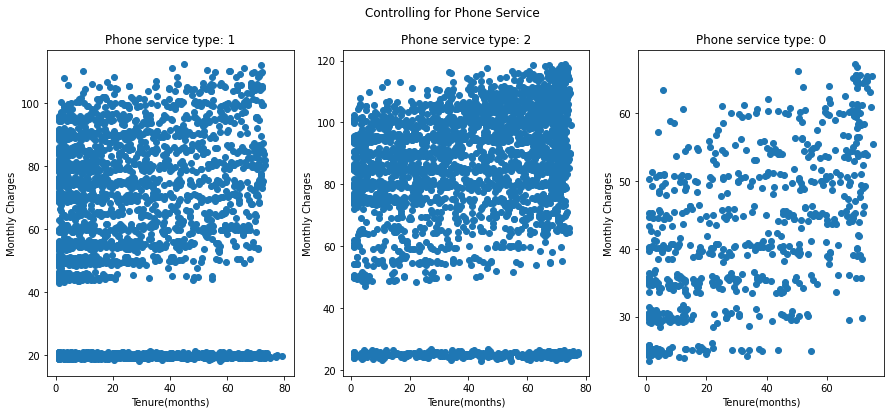

In [28]:
#scatter plot of phone service
ct=0
plt.figure(figsize=(15,6))
plt.suptitle('Controlling for Phone Service')
for i in tc_ph:
    ct+=1
    plt.subplot(1,len(tc_ph),ct)
    plt.scatter(i.tenure,i.monthly_charges)
    plt.xlabel('Tenure(months)')
    plt.ylabel('Monthly Charges')
    plt.title(f'Phone service type: {i.phone_service.unique()[0]}')


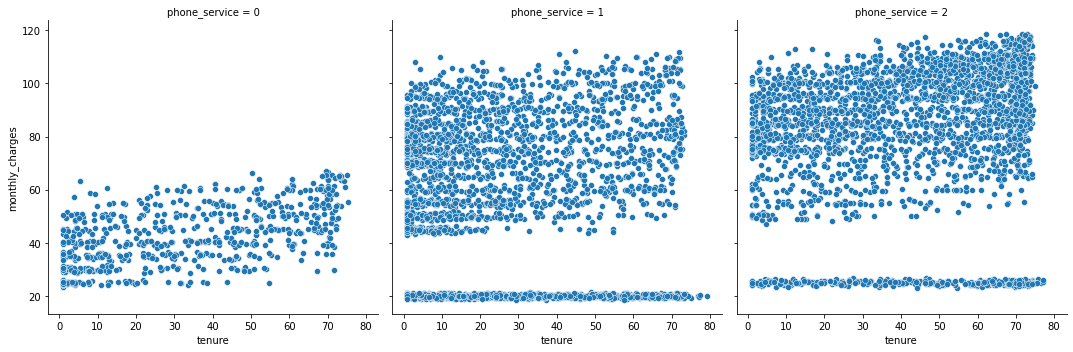

In [29]:
sns.relplot(data=tc,x='tenure',y='monthly_charges',col='phone_service')

In [30]:
i.phone_service.unique()[0]

0

In [31]:
#Does Tenure correlate to monthly charges when we control for phone and internet service?
#Control for phone services
null_h = "There is not a linear relationship between tenure and monthly charges, when we control for phone services"

for i in tc_ph:
    #Calc corr coefficient and get p
    r, p = stats.pearsonr(i.tenure,i.monthly_charges)
    #print which one we're doing
    print(f'\nFor phone service type: {i.phone_service.unique()[0]}')
    #print results
    stats_result(p,null_h,alpha=α,r=r)



For phone service type: 1

The null hypothesis was: There is not a linear relationship between tenure and monthly charges, when we control for phone services

We reject the null hypothesis, p = 0.0003243924665082648 | α = 0.05
  r: 0.06170850779677226

For phone service type: 2

The null hypothesis was: There is not a linear relationship between tenure and monthly charges, when we control for phone services

We reject the null hypothesis, p = 1.2593536935229807e-13 | α = 0.05
  r: 0.1354742534736876

For phone service type: 0

The null hypothesis was: There is not a linear relationship between tenure and monthly charges, when we control for phone services

We reject the null hypothesis, p = 6.954734519987262e-66 | α = 0.05
  r: 0.5929219670151437


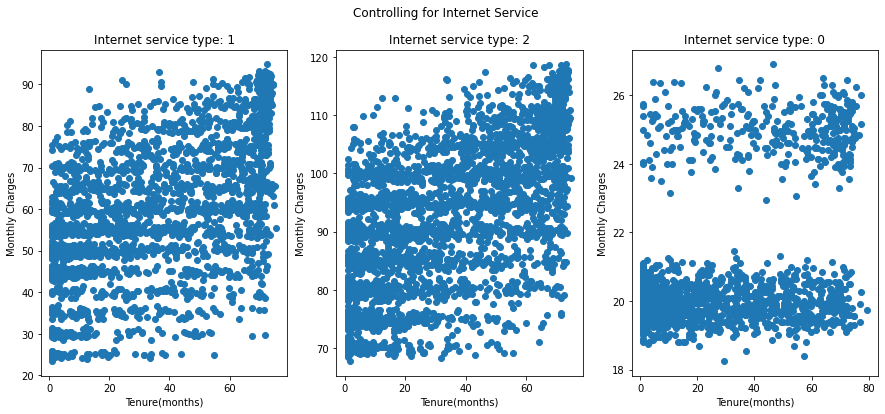

In [32]:
#Does Tenure correlate to monthly charges when we control for phone and internet service?
#scatter plot of internet service/monthly charges
ct=0
plt.figure(figsize=(15,6))
plt.suptitle('Controlling for Internet Service')
for i in tc_int:
    ct+=1
    plt.subplot(1,len(tc_int),ct)
    plt.scatter(i.tenure,i.monthly_charges)
    plt.xlabel('Tenure(months)')
    plt.ylabel('Monthly Charges')
    plt.title(f'Internet service type: {i.internet_service.unique()[0]}')


In [33]:
#Does Tenure correlate to monthly charges when we control for phone and internet service?          
#control for internet services
null_h = "There is not a linear relationship between tenure and monthly charges, when we control for internet services"

for i in tc_int:
    #Calc corr coefficient and get p
    r, p = stats.pearsonr(i.tenure,i.monthly_charges)
    #print which one we're doing
    print(f'\nFor internet service type: {i.internet_service.unique()[0]}')
    #print results
    stats_result(p,null_h,alpha=α,r=r)


For internet service type: 1

The null hypothesis was: There is not a linear relationship between tenure and monthly charges, when we control for internet services

We reject the null hypothesis, p = 9.287279569621869e-168 | α = 0.05
  r: 0.520268454877228

For internet service type: 2

The null hypothesis was: There is not a linear relationship between tenure and monthly charges, when we control for internet services

We reject the null hypothesis, p = 0.0 | α = 0.05
  r: 0.6249259963754018

For internet service type: 0

The null hypothesis was: There is not a linear relationship between tenure and monthly charges, when we control for internet services

We reject the null hypothesis, p = 3.799962564494557e-44 | α = 0.05
  r: 0.3462893388032986


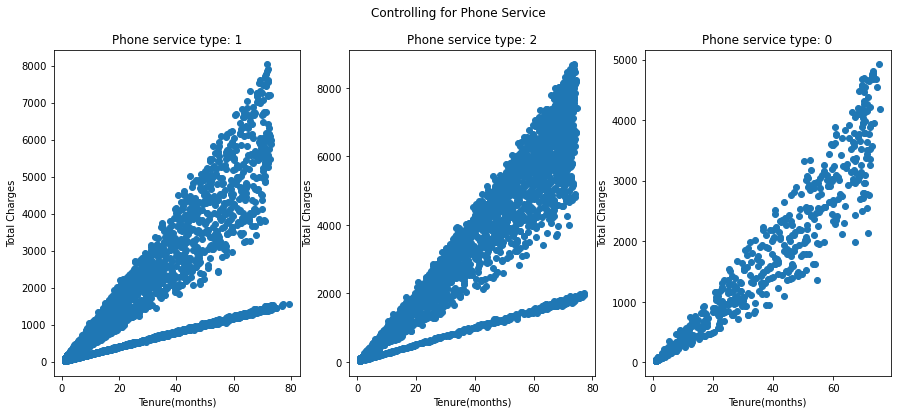

In [34]:
#scatter plot of phone service/total charges
ct=0
plt.figure(figsize=(15,6))
plt.suptitle('Controlling for Phone Service')
for i in tc_ph:
    ct+=1
    plt.subplot(1,len(tc_ph),ct)
    plt.scatter(i.tenure,i.total_charges)
    plt.xlabel('Tenure(months)')
    plt.ylabel('Total Charges')
    plt.title(f'Phone service type: {i.phone_service.unique()[0]}')

In [35]:
#Does Tenure correlate to total charges when we control for phone service?
#Control for phone services
null_h = "There is not a linear relationship between tenure and total charges, when we control for phone services"

for i in tc_ph:
    #Calc corr coefficient and get p
    r, p = stats.pearsonr(i.tenure,i.total_charges)
    #print which one we're doing
    print(f'\nFor phone service type: {i.phone_service.unique()[0]}')
    #print results
    stats_result(p,null_h,alpha=α,r=r)



For phone service type: 1

The null hypothesis was: There is not a linear relationship between tenure and total charges, when we control for phone services

We reject the null hypothesis, p = 0.0 | α = 0.05
  r: 0.772080668041668

For phone service type: 2

The null hypothesis was: There is not a linear relationship between tenure and total charges, when we control for phone services

We reject the null hypothesis, p = 0.0 | α = 0.05
  r: 0.8418257674637378

For phone service type: 0

The null hypothesis was: There is not a linear relationship between tenure and total charges, when we control for phone services

We reject the null hypothesis, p = 0.0 | α = 0.05
  r: 0.9543062640520061


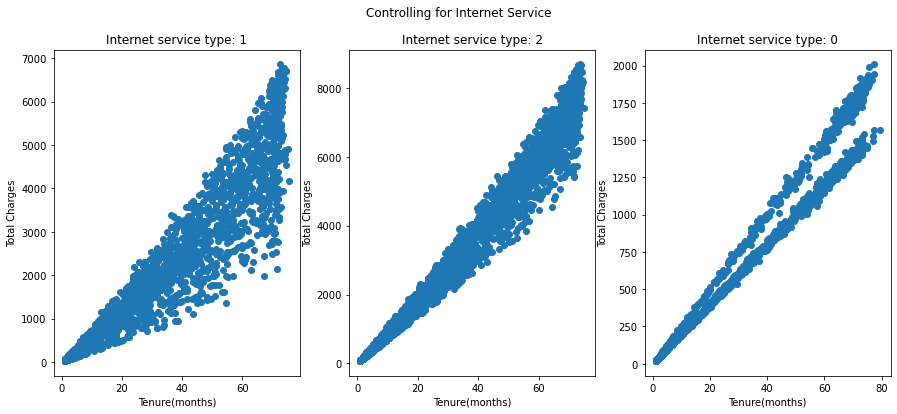

In [36]:
#Does Tenure correlate to total charges when we control for  internet service?
#scatter plot of internet service/monthly charges
ct=0
plt.figure(figsize=(15,6))
plt.suptitle('Controlling for Internet Service')
for i in tc_int:
    ct+=1
    plt.subplot(1,len(tc_int),ct)
    plt.scatter(i.tenure,i.total_charges)
    plt.xlabel('Tenure(months)')
    plt.ylabel('Total Charges')
    plt.title(f'Internet service type: {i.internet_service.unique()[0]}')


In [37]:
#Does Tenure correlate to total charges when we control for internet service?
#Control for phone services
null_h = "There is not a linear relationship between tenure and total charges, when we control for internet services"

for i in tc_int:
    #Calc corr coefficient and get p
    r, p = stats.pearsonr(i.tenure,i.total_charges)
    #print which one we're doing
    print(f'\nFor internet service type: {i.internet_service.unique()[0]}')
    #print results
    stats_result(p,null_h,alpha=α,r=r)



For internet service type: 1

The null hypothesis was: There is not a linear relationship between tenure and total charges, when we control for internet services

We reject the null hypothesis, p = 0.0 | α = 0.05
  r: 0.9418393863558967

For internet service type: 2

The null hypothesis was: There is not a linear relationship between tenure and total charges, when we control for internet services

We reject the null hypothesis, p = 0.0 | α = 0.05
  r: 0.9859664567144112

For internet service type: 0

The null hypothesis was: There is not a linear relationship between tenure and total charges, when we control for internet services

We reject the null hypothesis, p = 0.0 | α = 0.05
  r: 0.9843017870543533


#### Employees Database (#2)

In [38]:
#Is there a relationship between how long an employee has been with the company and their salary
# Get the data
sql = """
SELECT emp_no, DATEDIFF(hire_date,CURDATE()) as 'tenure_d', s.salary FROM employees
JOIN salaries as s USING(emp_no)
#Only current employees
WHERE s.to_date >= CURDATE();
"""
df = pd.read_sql(sql,get_db_url('employees'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   emp_no    240124 non-null  int64
 1   tenure_d  240124 non-null  int64
 2   salary    240124 non-null  int64
dtypes: int64(3)
memory usage: 5.5 MB


In [39]:
null_h = "There is not a linear relationship between employee tenure and salary"
r, p = stats.pearsonr(df.tenure_d,df.salary)

stats_result(p,null_h,alpha=α,r=r)


The null hypothesis was: There is not a linear relationship between employee tenure and salary

We reject the null hypothesis, p = 0.0 | α = 0.05
  r: -0.3064625613186086


In [40]:
#Is there a relationship between how long an employee has been with the company and 
# the number of titles they have held?

# Get the data
sql = """
SELECT emp_no, COUNT(title) as num_title, DATEDIFF(hire_date,CURDATE()) as 'tenure_d' FROM employees
JOIN titles USING(emp_no)
#use this to only look at current employees
JOIN dept_emp as de USING(emp_no) 
WHERE de.to_date >= CURDATE()
GROUP BY emp_no;
"""
df = pd.read_sql(sql,get_db_url('employees'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   emp_no     240124 non-null  int64
 1   num_title  240124 non-null  int64
 2   tenure_d   240124 non-null  int64
dtypes: int64(3)
memory usage: 5.5 MB


In [41]:
null_h = "There is not a linear relationship between employee tenure and the number of titles they have held"
r, p = stats.pearsonr(df.tenure_d,df.num_title)

stats_result(p,null_h,alpha=α,r=r)


The null hypothesis was: There is not a linear relationship between employee tenure and the number of titles they have held

We reject the null hypothesis, p = 0.0 | α = 0.05
  r: -0.28712678896995486


#### Sleepstudy data (#3)

In [42]:
df = data('sleepstudy')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

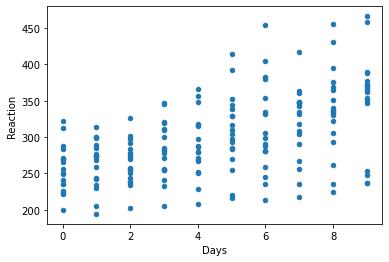

In [43]:
df.plot.scatter(x='Days',y='Reaction')

In [44]:
null_h = "there is not a linear correlation between days and reaction time"
r, p = stats.pearsonr(df.Days,df.Reaction)

stats_result(p,null_h,alpha=α,r=r)


The null hypothesis was: there is not a linear correlation between days and reaction time

We reject the null hypothesis, p = 9.894096322214812e-15 | α = 0.05
  r: 0.5352302262650253


### Chi Squared Exercises

In [45]:
#1 Macbook and Codeup Students

#create DF of observed values
obs = pd.DataFrame([[49,20],[1,30]],columns = ['Codeup Student','Not Codeup Student'],index=['Macbook','Other'])
obs

,Codeup Student,Not Codeup Student
Macbook,49,20
Other,1,30


In [46]:
null_h = 'Using a macbook and being a codeup student are independent of each other.'

chi2, p = stats.chi2_contingency(obs)[0:2]

#print results, use default alpha of .05
stats_result(p,null_h,chi2=chi2)


The null hypothesis was: Using a macbook and being a codeup student are independent of each other.

We reject the null hypothesis, p = 1.4116760526193828e-09 | α = 0.05
  chi2: 36.65264142122487


In [47]:
#2 choose 2 categorical variables from mpg dataset

#import data
mpg = data('mpg')
mpg.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


In [48]:
obs = pd.crosstab(mpg.drv,mpg['class'])
obs

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
drv,,,,,,,
4,0,12,3,0,33,4,51
f,0,35,38,11,0,22,0
r,5,0,0,0,0,9,11


In [49]:
null_h = "A vehicle's drive type and class are independent"
#now run chi 2
chi2, p = stats.chi2_contingency(obs)[0:2]

#pretty print, use alpha of .05
stats_result(p,null_h,chi2=chi2)


The null hypothesis was: A vehicle's drive type and class are independent

We reject the null hypothesis, p = 1.1048811174475079e-40 | α = 0.05
  chi2: 221.6011438535253


In [50]:
#3) use empl

In [51]:
#3a) is an employee's gender independent of whether an employee works in sales or marketing?
#get the data
sql = '''
SELECT gender, dept_name
FROM employees
JOIN dept_emp as de USING(emp_no)
JOIN departments USING(dept_no)
WHERE de.to_date >= CURDATE();
'''
df = pd.read_sql(sql,get_db_url('employees'))
df.dept_name.unique()

array(['Customer Service', 'Development', 'Finance', 'Human Resources',
       'Marketing', 'Production', 'Quality Management', 'Research',
       'Sales'], dtype=object)

In [52]:
#filter out only sales and marketing
# df = df[(df.dept_name == 'Sales') | (df.dept_name == 'Marketing')]
# df.dept_name.unique()
#I don't think that ^^ is what they want

#I'm assuming they want to compare employees in sales and marketing, to employees in any other department

#create new column indicating if employee works in sales or marketing
df['in_SorM'] = ((df.dept_name == 'Sales') | (df.dept_name == 'Marketing'))
df.head()

,gender,dept_name,in_SorM
0,M,Customer Service,False
1,F,Customer Service,False
2,M,Customer Service,False
3,F,Customer Service,False
4,F,Customer Service,False


In [53]:
obs = pd.crosstab(df.in_SorM,df.gender)
obs

gender,F,M
in_SorM,,
False,75147,112434
True,20863,31680


In [54]:
#do some stats
null_h = "An employee's gender is independent of whether they work in sales or marketing."

chi2, p = stats.chi2_contingency(obs)[0:2]
#alpha is .05
stats_result(p,null_h,chi2=chi2)


The null hypothesis was: An employee's gender is independent of whether they work in sales or marketing.

We failed to reject the null hypothesis, p = 0.143911663394633 | α = 0.05
  chi2: 2.135626419609239


In [55]:
#3b) Is an employee's gender independent of whether or not they are or have been a manager?
sql = '''
SELECT gender, dept_no
FROM employees
LEFT JOIN dept_manager as dm USING(emp_no);
'''

df = pd.read_sql(sql,get_db_url('employees'))
df.head(2)

,gender,dept_no
0,M,None
1,F,None


In [56]:
#Create new column that indicates if they are or have been a manager
df['manager'] = ~df.dept_no.isnull()
df.head(2)

,gender,dept_no,manager
0,M,None,False
1,F,None,False


In [57]:
obs = pd.crosstab(df.manager,df.gender)
obs

gender,F,M
manager,,
False,120038,179962
True,13,11


In [58]:
#stats
null_h = "An employee's gender is independent of whether or not they have ever been a manager."

chi2, p = stats.chi2_contingency(obs)[0:2]

stats_result(p,null_h,chi2=chi2)


The null hypothesis was: An employee's gender is independent of whether or not they have ever been a manager.

We failed to reject the null hypothesis, p = 0.22745818732810363 | α = 0.05
  chi2: 1.4566857643547197
